In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Pandas Data Types

In [2]:
# 2 main datatypes Series (1 Dimensional) and DataFrame (2 Dimensional)
series = pd.Series(["BMW", "Toyota", "Honda"])
colors = pd.Series(["Blue", "Red", "White"]) 
prices = pd.Series(["$1,000", "$2,000", "$3,000"])

In [3]:
# DataFrame = 2 dimensional
car_data = pd.DataFrame({"Car make": series, "Color": colors, "Price": prices})
car_data["Car make"]

0       BMW
1    Toyota
2     Honda
Name: Car make, dtype: object

In [4]:
print("series.dtype : ", series.dtype)
print("car_data.dtypes : ", car_data.dtypes)

series.dtype :  object
car_data.dtypes :  Car make    object
Color       object
Price       object
dtype: object


### Data, Column and Dimension Issues:
- data shape's horizontal axis should match column's count
- for 1d array, all data is considerd vertical row, so only one column will fit there
- to make horizontal row with matching column's count, we need to reshape the data to 2d.

In [6]:
some_data_1d = pd.DataFrame(["a", "b", "c"], columns=["Col1"])
some_data_2d = pd.DataFrame([[1,2,3]], columns=["Col1","Col2","Col3"])
some_data_1d, some_data_2d

(  Col1
 0    a
 1    b
 2    c,
    Col1  Col2  Col3
 0     1     2     3)

### Type conversion : String to Int on DataFrames

In [5]:
# convert car_data's price from object to int
car_data["Price"] = car_data["Price"].str.replace(r'[^0-9]', '', regex=True).astype(int)
car_data
# Note: if string is converted into int, str.repl 

,Car make,Color,Price
0,BMW,Blue,1000
1,Toyota,Red,2000
2,Honda,White,3000


In [6]:
# Import data
car_sales = pd.read_csv("car-sales.csv")
car_sales.Brand.head()

0              BMW
1    Mercedes-Benz
2    Mercedes-Benz
3             Audi
4           Toyota
Name: Brand, dtype: object

In [7]:
# Exporting a data frame
# index = False to stop forced indexing of the csv rows
car_sales.to_csv("exported-car-sales.csv", index = False)
# car_sales.to_exel("exported-car-sales.xl")

In [8]:
# import exported csv
car_sales_exported = pd.read_csv("exported-car-sales.csv")
car_sales_exported.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Attributes and Functions:

In [9]:
# Attribute / Prop : extra info about (properties of) a data frame (Object).
car_sales.dtypes

Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object

In [10]:
car_sales.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'],
      dtype='object')

In [11]:
car_sales.index

RangeIndex(start=0, stop=4345, step=1)

In [12]:
# Function : operations on data frame
car_sales.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [13]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [14]:
# avarages
car_sales.Price.mean()

19418.746935058713

In [15]:
car_sales.Price.sum()

81034430.96000001

In [16]:
car_sales["Price"].sum()

81034430.96000001

In [17]:
len(car_sales)

4345

In [18]:
# last data of a data frame
car_sales.tail()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla
4344,Volkswagen,13500.0,van,124,2.0,Diesel,yes,2013,T5 (Transporter)


In [19]:
# .loc & .iloc : Getting data from location id and index location
print(colors.loc[1], colors.loc[2], colors.loc[0])

Red White Blue


In [20]:
# Slice Operation
car_sales[:7]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320


### Accessing Column [] vs .

In [21]:
# dot notation is only possible with column name with no space
car_sales.Brand.head()

0              BMW
1    Mercedes-Benz
2    Mercedes-Benz
3             Audi
4           Toyota
Name: Brand, dtype: object

In [22]:
# [] notation can receive column name with space
car_sales["Engine Type"].head()

0    Petrol
1    Diesel
2       Gas
3    Petrol
4    Petrol
Name: Engine Type, dtype: object

In [23]:
# Data Frame SubSet with selected coulmns
car_sales[["Brand","Price"]]

,Brand,Price
0,BMW,4200.0
1,Mercedes-Benz,7900.0
2,Mercedes-Benz,13300.0
3,Audi,23000.0
4,Toyota,18300.0
...,...,...
4340,Mercedes-Benz,125000.0
4341,BMW,6500.0
4342,BMW,8000.0
4343,Toyota,14200.0


### Filtering || Boolean indexing:
Show data from a data frame with matching condition

In [24]:
# Showing car sales data where Column "Brand" is only "Toyota"
car_sales[car_sales["Brand"] == "Toyota"].head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
14,Toyota,16000.0,crossover,250,4.7,Gas,yes,2001,Land Cruiser 100
18,Toyota,26500.0,crossover,21,2.0,Petrol,yes,2013,Rav 4
20,Toyota,38233.0,other,0,2.4,Diesel,yes,2016,Hilux
35,Toyota,14500.0,sedan,147,2.4,Gas,yes,2006,Camry


In [25]:
car_sales[car_sales["Mileage"] > 321].head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
26,Audi,6500.0,sedan,330,2.4,Petrol,yes,1999,A6
42,BMW,7700.0,sedan,326,2.8,Petrol,yes,1998,528


 ### Comparing Columns:

In [26]:
pd.crosstab(car_sales["Brand"], car_sales["Price"]).head()

Price,600.00,800.00,999.00,1100.00,1150.00,1180.00,1185.60,1199.00,1200.00,1296.75,...,189999.00,195000.00,199999.00,200000.00,219900.00,222000.00,249999.00,250000.00,295000.00,300000.00
Brand,,,,,,,,,,,,,,,,,,,,,
Audi,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BMW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mercedes-Benz,0,0,0,0,0,0,0,0,1,0,...,1,1,4,1,2,1,1,1,2,2
Mitsubishi,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Renault,0,1,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Groupby:
It Group DataFrame using a mapper or by a Series of columns.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [27]:
# Groupby
car_sales_sub = car_sales[["Brand","Price"]]
car_sales_sub.groupby(["Brand"]).mean()

,Price
Brand,
Audi,18489.633484
BMW,23525.368087
Mercedes-Benz,30608.048122
Mitsubishi,11295.713003
Renault,8035.127018
Toyota,22591.220287
Volkswagen,13125.267930


### Data Frame Visualization:

<Axes: >

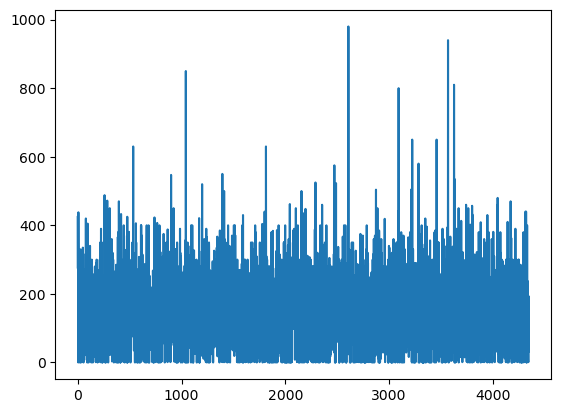

In [28]:
# using Matplotlib
# %matplotlib inline (inlining matplotlib)
car_sales["Mileage"].plot()

<Axes: >

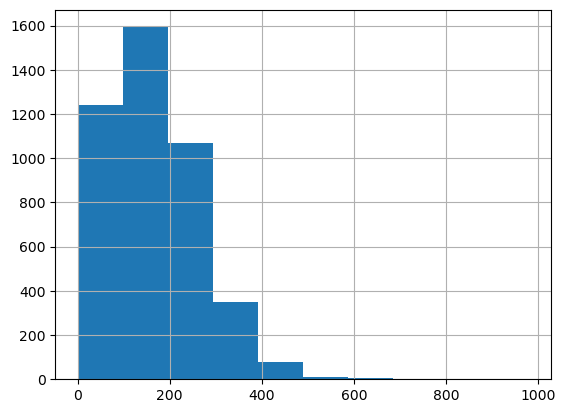

In [29]:
car_sales["Mileage"].hist()

<Axes: >

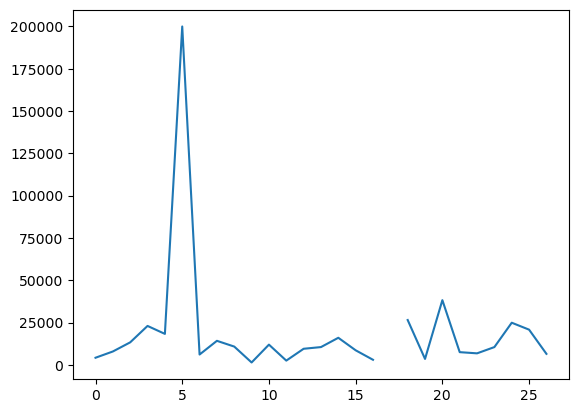

In [30]:
car_sales["Price"].head(27).plot(kind="line")

### Data Manipulating:

In [31]:
# triming down data sets
car_sales = car_sales.head(21)
# making the brand name lower case
car_sales["Brand"].str.lower()

0               bmw
1     mercedes-benz
2     mercedes-benz
3              audi
4            toyota
5     mercedes-benz
6               bmw
7              audi
8           renault
9        volkswagen
10          renault
11          renault
12             audi
13       volkswagen
14           toyota
15          renault
16              bmw
17    mercedes-benz
18           toyota
19             audi
20           toyota
Name: Brand, dtype: object

### Filling Nan/Empty Cells

In [32]:
car_sales[car_sales.isnull().any(axis=1)]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
17,Mercedes-Benz,NaN,van,240,2.2,Diesel,yes,2007,Vito


In [33]:
car_sales_fill_task = car_sales.copy()
car_sales_fill_task
# filling a empty cell to average value
car_sales_fill_task["Price"].fillna(car_sales_fill_task["Price"].mean())
# # add average value to Nan field to the existing data frame by inplace=True
car_sales_fill_task["Price"].fillna(car_sales_fill_task["Price"].mean(), inplace=True)
# # this will also work
# # car_sales_fill_task["Price"] = car_sales_fill_task["Price"].fillna(car_sales_fill_task ["Price"].mean())
car_sales_fill_task["Price"]

0       4200.00
1       7900.00
2      13300.00
3      23000.00
4      18300.00
5     199999.00
6       6100.00
7      14200.00
8      10799.00
9       1400.00
10     11950.00
11      2500.00
12      9500.00
13     10500.00
14     16000.00
15      8600.00
16      2990.00
17     21473.55
18     26500.00
19      3500.00
20     38233.00
Name: Price, dtype: float64

### Removing Nan/Empty Cell:

In [34]:
car_sales_nan_rm = car_sales.copy()
car_sales_nan_rm.dropna(inplace=True)
car_sales_nan_rm

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.00,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV


### Deleting and Adding columns to an Exixting DF:

In [35]:
# creating sub data set form a df
car_sales_mod = car_sales[["Brand", "Price", "Mileage"]].head(7).copy()
# add new column to a df suing Series
seat_count = pd.Series([4,5,6,7,8,9,10])
car_sales_mod["Seats"] = seat_count

# add new column to df using python list
fuel_economy = [7, 8, 9, 10, 5, 7, 7]
car_sales_mod["FuelEco"] = fuel_economy
car_sales_mod

,Brand,Price,Mileage,Seats,FuelEco
0,BMW,4200.0,277,4,7
1,Mercedes-Benz,7900.0,427,5,8
2,Mercedes-Benz,13300.0,358,6,9
3,Audi,23000.0,240,7,10
4,Toyota,18300.0,120,8,5
5,Mercedes-Benz,199999.0,0,9,7
6,BMW,6100.0,438,10,7


In [36]:
# columns form calculated values
car_sales_mod["Total Fule Used"] = car_sales_mod["Mileage"] / car_sales_mod["FuelEco"]
car_sales_mod

,Brand,Price,Mileage,Seats,FuelEco,Total Fule Used
0,BMW,4200.0,277,4,7,39.571429
1,Mercedes-Benz,7900.0,427,5,8,53.375000
2,Mercedes-Benz,13300.0,358,6,9,39.777778
3,Audi,23000.0,240,7,10,24.000000
4,Toyota,18300.0,120,8,5,24.000000
5,Mercedes-Benz,199999.0,0,9,7,0.000000
6,BMW,6100.0,438,10,7,62.571429


In [37]:
# add column using a single value
car_sales_mod["Wheels"] = 4
car_sales_mod

,Brand,Price,Mileage,Seats,FuelEco,Total Fule Used,Wheels
0,BMW,4200.0,277,4,7,39.571429,4
1,Mercedes-Benz,7900.0,427,5,8,53.375000,4
2,Mercedes-Benz,13300.0,358,6,9,39.777778,4
3,Audi,23000.0,240,7,10,24.000000,4
4,Toyota,18300.0,120,8,5,24.000000,4
5,Mercedes-Benz,199999.0,0,9,7,0.000000,4
6,BMW,6100.0,438,10,7,62.571429,4


In [38]:
# Dropping a column
car_sales_mod_d = car_sales_mod.drop("Total Fule Used", axis=1).copy()
car_sales_mod_d

,Brand,Price,Mileage,Seats,FuelEco,Wheels
0,BMW,4200.0,277,4,7,4
1,Mercedes-Benz,7900.0,427,5,8,4
2,Mercedes-Benz,13300.0,358,6,9,4
3,Audi,23000.0,240,7,10,4
4,Toyota,18300.0,120,8,5,4
5,Mercedes-Benz,199999.0,0,9,7,4
6,BMW,6100.0,438,10,7,4


### Randomizing Data Samples:

In [39]:
# .1 for 10% and 1 for 100%
car_sale_shuffed = car_sales.sample(frac=1)
# reset the randomized data's index also delete the old indexs
car_sale_shuffed.reset_index(drop=True,inplace=True)
car_sale_shuffed

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011,Megane
1,Audi,3500.0,vagon,250,2.50,Diesel,no,1998,A6
2,Audi,9500.0,vagon,165,2.70,Gas,yes,2003,A6 Allroad
3,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
4,Toyota,38233.0,other,0,2.40,Diesel,yes,2016,Hilux
5,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
6,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
7,Mercedes-Benz,NaN,van,240,2.20,Diesel,yes,2007,Vito
8,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994,19
9,Toyota,26500.0,crossover,21,2.00,Petrol,yes,2013,Rav 4


In [40]:
# changing existing colums value using applay and lambda(annonymous fn)
car_sales_mod["Mileage"] = car_sales_mod["Mileage"].apply(lambda x: x * 1.61)
car_sales_mod

,Brand,Price,Mileage (KM),Seats,FuelEco,Total Fule Used,Wheels
0,BMW,4200.0,445.97,4,7,39.571429,4
1,Mercedes-Benz,7900.0,687.47,5,8,53.375000,4
2,Mercedes-Benz,13300.0,576.38,6,9,39.777778,4
3,Audi,23000.0,386.40,7,10,24.000000,4
4,Toyota,18300.0,193.20,8,5,24.000000,4
5,Mercedes-Benz,199999.0,0.00,9,7,0.000000,4
6,BMW,6100.0,705.18,10,7,62.571429,4


### Column Rename:

In [42]:
# change Milage to Milage (KM) and convert Mile to KM
car_sales_mod.rename(columns={"Mileage": "Mileage (KM)"}, inplace=True)
car_sales_mod

,Brand,Price,Mileage (KM),Seats,FuelEco,Total Fule Used,Wheels
0,BMW,4200.0,445.97,4,7,39.571429,4
1,Mercedes-Benz,7900.0,687.47,5,8,53.375000,4
2,Mercedes-Benz,13300.0,576.38,6,9,39.777778,4
3,Audi,23000.0,386.40,7,10,24.000000,4
4,Toyota,18300.0,193.20,8,5,24.000000,4
5,Mercedes-Benz,199999.0,0.00,9,7,0.000000,4
6,BMW,6100.0,705.18,10,7,62.571429,4
